In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

Use Kaggle USA Real Estate dataset to predict the price of the house. The dataset contains the following columns:

- **brokered by** (categorically encoded agency/broker)
- **status** (Housing status - a. ready for sale or b. ready to build)
- **price** (Housing price, it is either the current listing price or recently sold price if the house is sold recently)
- **bed** (# of beds)
- **bath** (# of bathrooms)
- **acre_lot** (Property / Land size in acres)
- **street** (categorically encoded street address)
- **city** (city name)
- **state** (state name)
- **zip_code** (postal code of the area)
- **house_size** (house area/size/living space in square feet)
- **prev_sold_date** (Previously sold date)
- **prev_sold_price** (Previously sold price)

The goal is to predict the price of the house based on the given features.

URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/code

In [2]:
import os 

df = pd.read_csv(os.path.join("data", "usa-house-data.csv"))
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


# Use pandas

Pandas from sql
https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

Pandas from Excel
https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_spreadsheets.html

In [3]:
# Selecting columns
selected_columns = df[['price', 'bed', 'bath']]
selected_columns.head(5)

,price,bed,bath
0,105000.0,3.0,2.0
1,80000.0,4.0,2.0
2,67000.0,2.0,1.0
3,145000.0,4.0,2.0
4,65000.0,6.0,2.0


In [4]:
# Filtering rows based on a condition
filtered_rows = df[(df["status"] == "sold") & (df["bed"] > 3)] # Python way
filtered_rows2 = df.query('status == "sold" and bed > 3') # SQL way

filtered_rows2.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1414378,72408.0,sold,168000.0,6.0,4.0,0.05,1157317.0,Anasco,Puerto Rico,610.0,3422.0,2021-10-21
1414382,60830.0,sold,250000.0,5.0,2.0,0.25,1946165.0,Arecibo,Puerto Rico,612.0,1210.0,2022-02-24
1414383,18211.0,sold,285000.0,4.0,3.0,NaN,1868141.0,Vega Alta,Puerto Rico,692.0,2600.0,2021-11-24
1414396,72216.0,sold,250000.0,4.0,2.0,3.00,NaN,Cabo Rojo,Puerto Rico,623.0,NaN,2021-11-18
1414398,16802.0,sold,120000.0,4.0,2.0,0.18,1921908.0,Sabana Grande,Puerto Rico,637.0,1188.0,2021-10-21


In [5]:
# Subsetting data based on rows and columns
df[1000:1001]


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1000,33842.0,for_sale,122900.0,3.0,1.0,NaN,1897232.0,San Juan,Puerto Rico,926.0,889.0,NaN


# EDA: Exploratory Data Analysis

## Descriptive statistics

In [6]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Counting the number of rows
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2221849.000,2224841.000,1745065.000,1714611.000,1900793.000,2215516.000,2226083.000,1657898.000
mean,52939.893,524195.519,3.276,2.496,15.223,1012324.921,52186.676,2714.471
std,30642.753,2138893.221,1.567,1.653,762.824,583763.478,28954.085,808163.520
min,0.000,0.000,1.000,1.000,0.000,0.000,0.000,4.000
25%,23861.000,165000.000,3.000,2.000,0.150,506312.750,29617.000,1300.000
50%,52884.000,325000.000,3.000,2.000,0.260,1012765.500,48382.000,1760.000
75%,79183.000,550000.000,4.000,3.000,0.980,1521173.250,78070.000,2413.000
max,110142.000,2147483600.000,473.000,830.000,100000.000,2001357.000,99999.000,1040400400.000


In [7]:
# Get summary statistics
df.shape

(2226382, 12)

In [8]:
# Get correlation matrix
df.corr(numeric_only=True)

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
brokered_by,1.000,-0.006,0.004,-0.004,0.000,0.001,0.063,-0.001
price,-0.006,1.000,0.115,0.178,0.016,-0.018,0.039,0.000
bed,0.004,0.115,1.000,0.612,-0.000,-0.000,0.003,0.190
bath,-0.004,0.178,0.612,1.000,-0.001,0.000,0.004,0.224
acre_lot,0.000,0.016,-0.000,-0.001,1.000,0.002,-0.002,0.001
street,0.001,-0.018,-0.000,0.000,0.002,1.000,-0.001,0.000
zip_code,0.063,0.039,0.003,0.004,-0.002,-0.001,1.000,0.001
house_size,-0.001,0.000,0.190,0.224,0.001,0.000,0.001,1.000


## Hypothesis testing and visualization

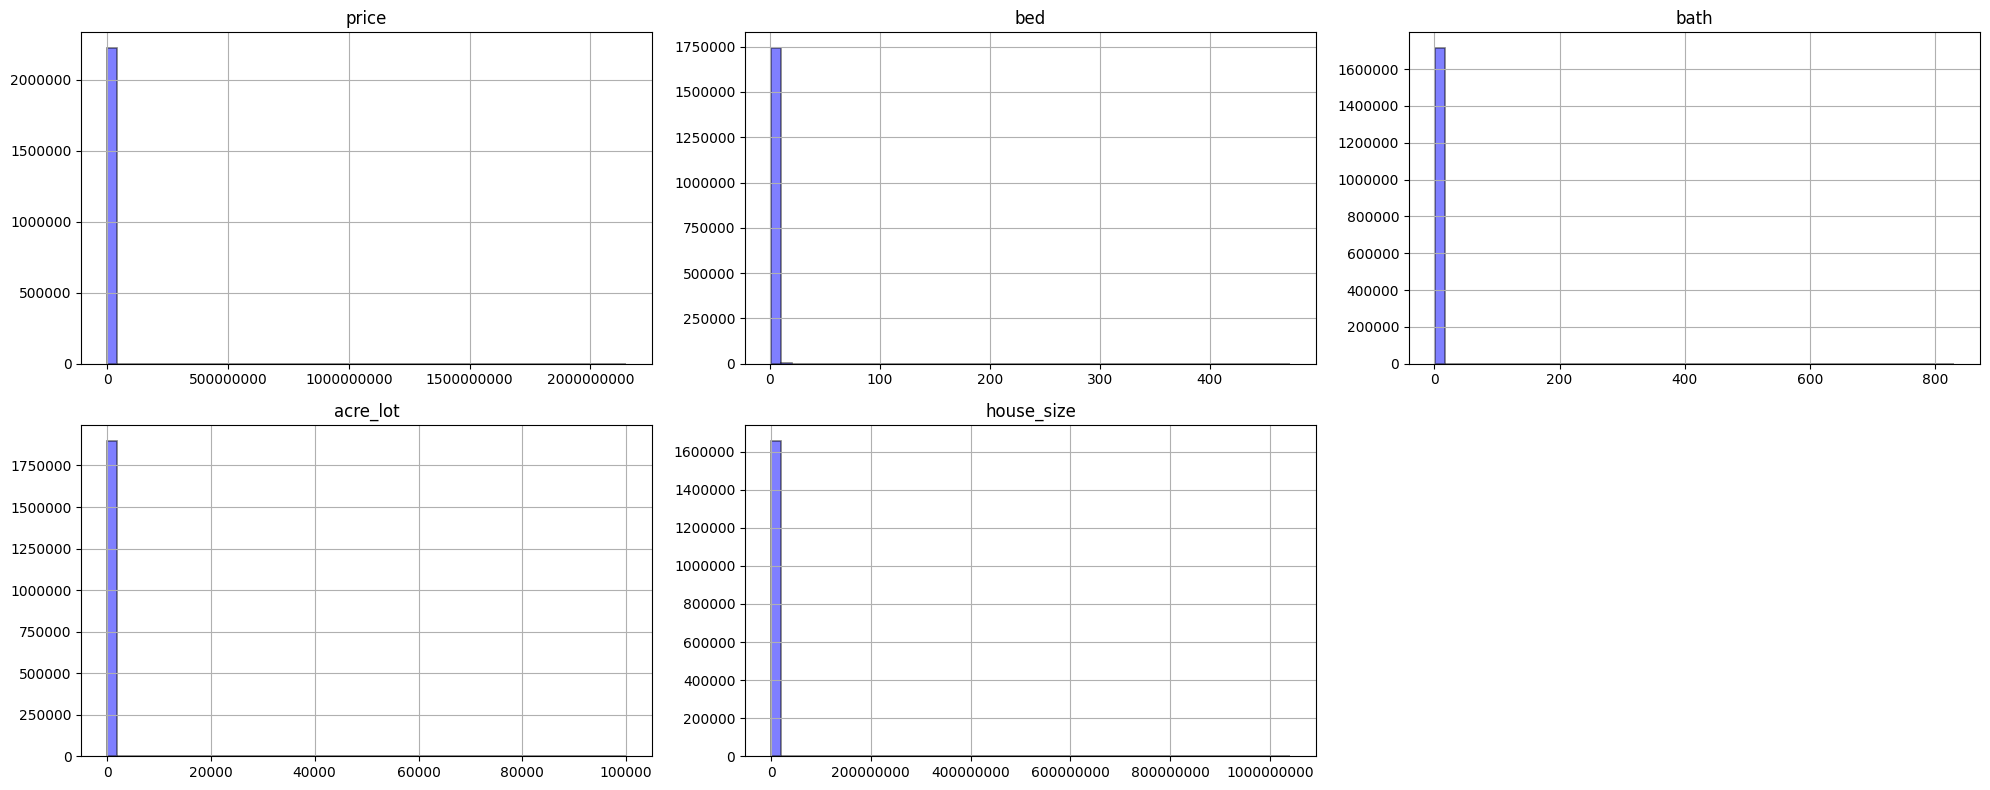

In [9]:

columns_to_plot_hist = ["price", "bed", "bath", "acre_lot", "house_size"]

hist = df.hist(
    column=columns_to_plot_hist,
    bins=50,
    figsize=(20, 8),
    layout=(2, 3),
    alpha=0.5,
    color="blue",
    edgecolor="black",
    linewidth=1.2,
)

# Format
for ax in hist.flatten():
    ax.ticklabel_format(style="plain")  # Esto desactiva la notación científica
plt.tight_layout() # Esto ajusta el espacio entre los gráficos

plt.show()

In [10]:
# Remove outliers values
df = df[(df["bed"] < 20) & (df["bath"] < 20) & (df["price"] < 100000000)]
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1700828.000,1703606.000,1703606.000,1703606.000,1431425.000,1697523.000,1703497.000,1604828.000
mean,52841.027,576770.599,3.251,2.490,13.135,929891.360,52184.678,2033.001
std,30538.424,1140578.625,1.164,1.159,809.635,533629.907,29719.457,3917.836
min,0.000,0.000,1.000,1.000,0.000,63.000,0.000,4.000
25%,23991.000,234900.000,3.000,2.000,0.140,467587.500,28735.000,1296.000
50%,52835.000,375000.000,3.000,2.000,0.210,930802.000,48473.000,1748.000
75%,79102.000,599900.000,4.000,3.000,0.460,1390679.500,78578.000,2400.000
max,110142.000,99500000.000,19.000,19.000,100000.000,2001321.000,99999.000,1560780.000


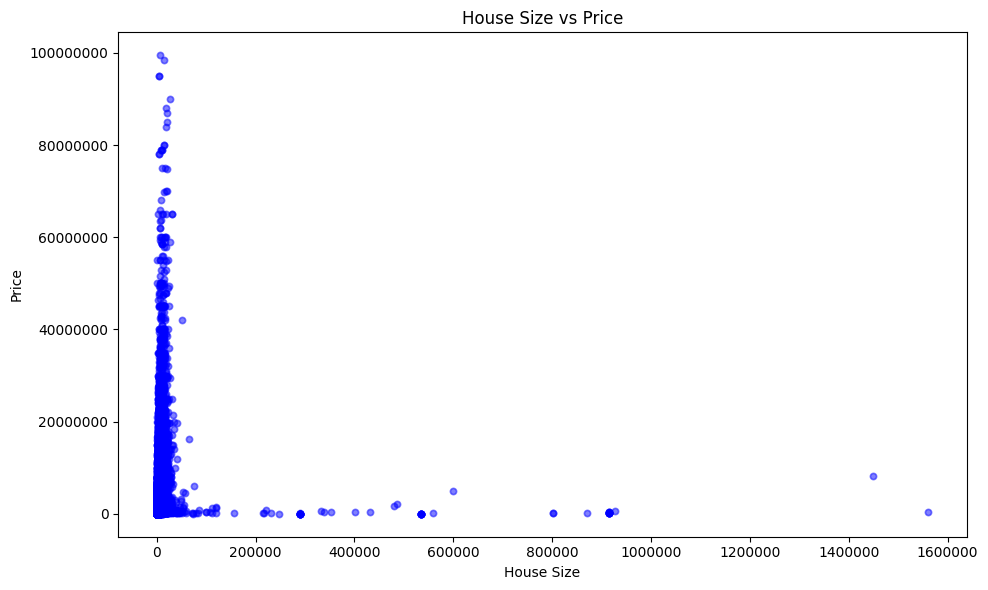

In [11]:
# ¿Does the house size affect the price?
house_price_plot = df.plot.scatter(x="house_size", y="price", figsize=(10, 6), color="blue", alpha=0.5, linewidth=1.2)

# Format
house_price_plot.set_xlabel("House Size")
house_price_plot.set_ylabel("Price")
house_price_plot.set_title("House Size vs Price")

house_price_plot.ticklabel_format(style="plain")  # Esto desactiva la notación científica
plt.tight_layout()  # Esto ajusta el espacio entre los gráficos

plt.show()

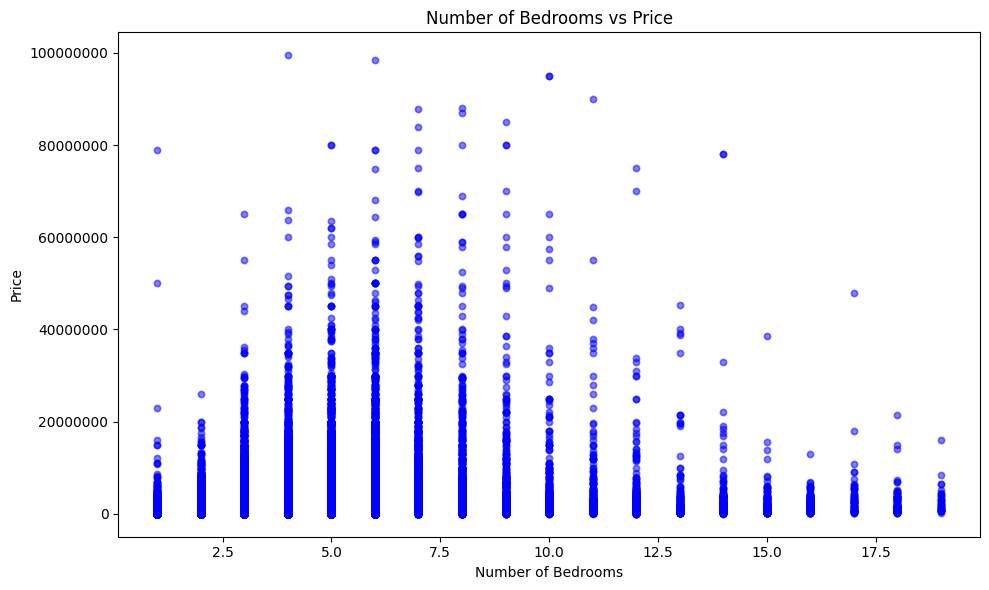

In [12]:
# ¿Does the number of bedrooms affect the price?
bed_price_plot = df.plot.scatter(x="bed", y="price", figsize=(10, 6), color="blue", alpha=0.5, linewidth=1.2)

# Format
bed_price_plot.set_xlabel("Number of Bedrooms")
bed_price_plot.set_ylabel("Price")
bed_price_plot.set_title("Number of Bedrooms vs Price")

bed_price_plot.ticklabel_format(style="plain")  # Esto desactiva la notación científica
plt.tight_layout()  # Esto ajusta el espacio entre los gráficos

plt.show()

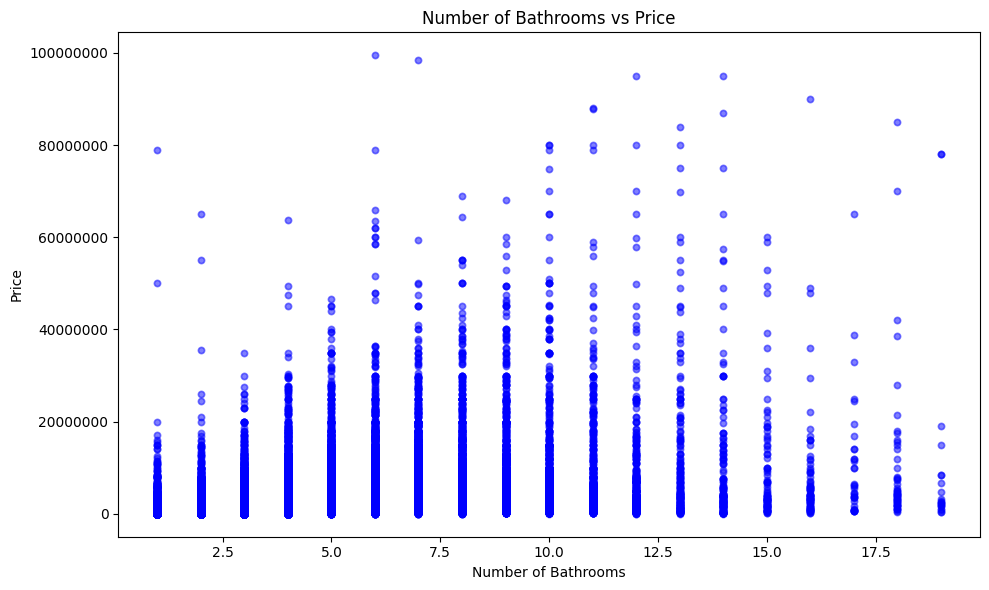

In [13]:
# ¿Does the number of bathrooms affect the price?
bath_price_plot = df.plot.scatter(x="bath", y="price", figsize=(10, 6), color="blue", alpha=0.5, linewidth=1.2)

# Format
bath_price_plot.set_xlabel("Number of Bathrooms")
bath_price_plot.set_ylabel("Price")
bath_price_plot.set_title("Number of Bathrooms vs Price")

bath_price_plot.ticklabel_format(style="plain")  # Esto desactiva la notación científica
plt.tight_layout()  # Esto ajusta el espacio entre los gráficos

plt.show()

In [14]:
# Number of houses sold vs houses not sold
df["status"].value_counts()


status
for_sale    972344
sold        731262
Name: count, dtype: int64

In [15]:
# Get the state number of houses sold and their average price
state_price = df.groupby("state")["price"].agg(["count", "mean"])
state_price

,count,mean
state,,
Alabama,20750,353484.393
Alaska,908,520915.013
Arizona,56317,546424.787
Arkansas,12483,325327.179
California,193108,1043597.309
Colorado,24291,909756.623
Connecticut,11943,698945.200
Delaware,7584,427785.654
District of Columbia,6126,895097.012


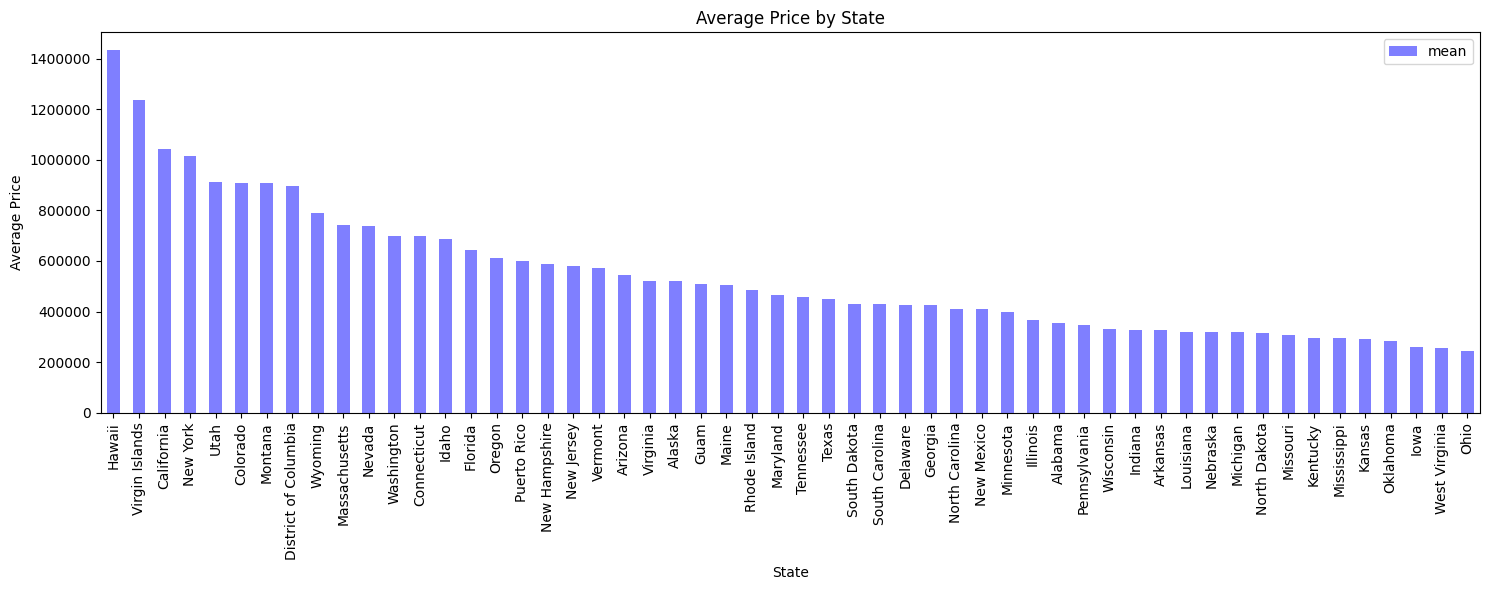

In [16]:
# ¿Does the state affect the price?
state_price_plot = state_price.sort_values(by="mean", ascending=False).plot.bar(
    y="mean", figsize=(15, 6), color="blue", alpha=0.5, linewidth=1.2
)

# Format
state_price_plot.set_xlabel("State")
state_price_plot.set_ylabel("Average Price")
state_price_plot.set_title("Average Price by State")

# Desactivar la notación científica en el eje y
state_price_plot.ticklabel_format(style="plain", axis="y")

plt.tight_layout()  # Esto ajusta el espacio entre los gráficos

plt.show()

# Data pre-processing

## Data cleaning

In [17]:
# Remove outliers values
df = df[(df["bed"] < 20) & (df["bath"] < 20) & (df["price"] < 100000000) & (df["house_size"] > 10)]

# Remove rows without price
df = df.dropna(subset=["price"])

# Remove rows with price equal to 0
df = df[df["price"] > 0]

# Remove rows with missing values on bed, bath, and house_size
df = df.dropna(subset=["bed", "bath", "house_size", "acre_lot"])

df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,1357838.000,1360095.000,1360095.000,1360095.000,1360095.000,1356071.000,1360007.000,1360095.000
mean,53568.862,569870.722,3.373,2.532,12.750,931704.936,55265.130,2114.916
std,30466.626,1063614.147,1.105,1.173,799.814,533258.877,29454.903,4159.802
min,0.000,1.000,1.000,1.000,0.000,63.000,601.000,100.000
25%,24768.000,239000.000,3.000,2.000,0.140,468465.500,30248.000,1360.000
50%,53005.000,379000.000,3.000,2.000,0.210,934036.000,55395.000,1812.000
75%,79221.000,600000.000,4.000,3.000,0.460,1392536.500,83455.000,2476.000
max,110142.000,99500000.000,19.000,19.000,100000.000,2001321.000,99999.000,1560780.000


In [18]:
# Remove unnecessary columns for Machine Learning
df = df.drop(columns=["prev_sold_date"])

In [19]:
# Because we will predict the price of the house, we will remove houses that are not sold
df = df[df["status"] == "sold"]

# Remove the status column
df = df.drop(columns=["status"])

df.head()

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
1414374,72457.000,524900.000,3.000,2.000,0.090,1850809.000,Aguada,Puerto Rico,602.000,2200.000
1414376,61711.000,90000.000,3.000,2.000,0.080,141421.000,Aguadilla,Puerto Rico,603.000,1421.000
1414377,49592.000,22500.000,2.000,1.000,0.320,1889894.000,Anasco,Puerto Rico,610.000,850.000
1414378,72408.000,168000.000,6.000,4.000,0.050,1157317.000,Anasco,Puerto Rico,610.000,3422.000
1414379,60830.000,200000.000,3.000,1.000,4.980,1855411.000,Arecibo,Puerto Rico,612.000,580.000


## Data encoding

### Label encoding
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [20]:
from sklearn.preprocessing import LabelEncoder

# Label encoder city
df["city"] = LabelEncoder().fit_transform(df["city"])

df.head(10)

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
1414374,72457.000,524900.000,3.000,2.000,0.090,1850809.000,56,Puerto Rico,602.000,2200.000
1414376,61711.000,90000.000,3.000,2.000,0.080,141421.000,57,Puerto Rico,603.000,1421.000
1414377,49592.000,22500.000,2.000,1.000,0.320,1889894.000,219,Puerto Rico,610.000,850.000
1414378,72408.000,168000.000,6.000,4.000,0.050,1157317.000,219,Puerto Rico,610.000,3422.000
1414379,60830.000,200000.000,3.000,1.000,4.980,1855411.000,305,Puerto Rico,612.000,580.000
1414380,60830.000,380000.000,2.000,2.000,0.190,1857001.000,305,Puerto Rico,612.000,1210.000
1414382,60830.000,250000.000,5.000,2.000,0.250,1946165.000,305,Puerto Rico,612.000,1210.000
1414387,103780.000,130000.000,3.000,1.000,0.070,1911843.000,1371,Puerto Rico,623.000,847.000
1414390,31238.000,165000.000,2.000,1.000,2.730,1856948.000,1371,Puerto Rico,623.000,696.000
1414398,16802.000,120000.000,4.000,2.000,0.180,1921908.000,8885,Puerto Rico,637.000,1188.000


### One hot encoding

#### Pandas
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [21]:
data = pd.get_dummies(df, prefix=["state_"], columns=["state"])

data.head()

,brokered_by,price,bed,bath,acre_lot,street,city,zip_code,house_size,state__Alabama,...,state__Tennessee,state__Texas,state__Utah,state__Vermont,state__Virgin Islands,state__Virginia,state__Washington,state__West Virginia,state__Wisconsin,state__Wyoming
1414374,72457.000,524900.000,3.000,2.000,0.090,1850809.000,56,602.000,2200.000,False,...,False,False,False,False,False,False,False,False,False,False
1414376,61711.000,90000.000,3.000,2.000,0.080,141421.000,57,603.000,1421.000,False,...,False,False,False,False,False,False,False,False,False,False
1414377,49592.000,22500.000,2.000,1.000,0.320,1889894.000,219,610.000,850.000,False,...,False,False,False,False,False,False,False,False,False,False
1414378,72408.000,168000.000,6.000,4.000,0.050,1157317.000,219,610.000,3422.000,False,...,False,False,False,False,False,False,False,False,False,False
1414379,60830.000,200000.000,3.000,1.000,4.980,1855411.000,305,612.000,580.000,False,...,False,False,False,False,False,False,False,False,False,False


#### Sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
one_hot_enc = OneHotEncoder(handle_unknown='ignore')

# Solve missing values error
column_data = df["state"].fillna("missing").values

# Generate numerics label first
column_data = label_enc.fit_transform(column_data.reshape(-1,1))

# Perform one hot encoding
one_hot_encoding_data = one_hot_enc.fit_transform(column_data.reshape(-1,1))

# Generate one hot encoding dataframe
one_hot_encoding_df = pd.DataFrame(
    data=one_hot_encoding_data.toarray(),
    columns=["state_" + c for c in label_enc.classes_],
)

# Concat encoded dataframe with original data and removes the old column
data = pd.concat([df, one_hot_encoding_df], axis=1)

data = data.drop(columns=["state"])

data.head()

c:\Users\gibra\Downloads\Class #4 Data Preprocessing\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,brokered_by,price,bed,bath,acre_lot,street,city,zip_code,house_size,state_Alabama,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
1414374,72457.000,524900.000,3.000,2.000,0.090,1850809.000,56.000,602.000,2200.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414376,61711.000,90000.000,3.000,2.000,0.080,141421.000,57.000,603.000,1421.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414377,49592.000,22500.000,2.000,1.000,0.320,1889894.000,219.000,610.000,850.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414378,72408.000,168000.000,6.000,4.000,0.050,1157317.000,219.000,610.000,3422.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1414379,60830.000,200000.000,3.000,1.000,4.980,1855411.000,305.000,612.000,580.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature normalization

In [23]:
from sklearn import preprocessing

# fill missing values with 0
dataset = data.fillna(0)

# Normalize data
scaler = preprocessing.MinMaxScaler()

dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

dataset.head()

,brokered_by,price,bed,bath,acre_lot,street,city,zip_code,house_size,state_Alabama,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,0.658,0.007,0.158,0.105,0.000,0.925,0.005,0.006,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.560,0.001,0.158,0.105,0.000,0.071,0.005,0.006,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.450,0.000,0.105,0.053,0.000,0.945,0.019,0.006,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.657,0.002,0.316,0.211,0.000,0.578,0.019,0.006,0.004,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.552,0.003,0.158,0.053,0.000,0.927,0.027,0.006,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [24]:
# Standarize data
scaler = preprocessing.StandardScaler()

# fill missing values with 0
dataset = data.fillna(0)

dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

dataset.head()


,brokered_by,price,bed,bath,acre_lot,street,city,zip_code,house_size,state_Alabama,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,1.336,0.484,0.755,0.552,-0.010,2.327,-0.766,-0.779,0.792,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
1,1.022,-0.302,0.755,0.552,-0.010,-0.540,-0.766,-0.779,0.285,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
2,0.669,-0.424,0.197,-0.153,-0.010,2.392,-0.723,-0.779,-0.086,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
3,1.334,-0.161,2.426,1.961,-0.010,1.164,-0.723,-0.779,1.586,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
4,0.997,-0.103,0.755,-0.153,-0.002,2.334,-0.700,-0.779,-0.262,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003


## Dimensionality reduction

In [25]:
from sklearn.feature_selection import VarianceThreshold

print(dataset.shape)

# Remove features with low variance
selector = VarianceThreshold(threshold=0.1)
dataset = pd.DataFrame(selector.fit_transform(dataset), columns=dataset.columns[selector.get_support()])

print(dataset.shape)

dataset.head()

(1219338, 60)
(1219338, 60)


,brokered_by,price,bed,bath,acre_lot,street,city,zip_code,house_size,state_Alabama,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,1.336,0.484,0.755,0.552,-0.010,2.327,-0.766,-0.779,0.792,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
1,1.022,-0.302,0.755,0.552,-0.010,-0.540,-0.766,-0.779,0.285,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
2,0.669,-0.424,0.197,-0.153,-0.010,2.392,-0.723,-0.779,-0.086,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
3,1.334,-0.161,2.426,1.961,-0.010,1.164,-0.723,-0.779,1.586,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003
4,0.997,-0.103,0.755,-0.153,-0.002,2.334,-0.700,-0.779,-0.262,-0.063,...,-0.052,-0.244,-0.015,-0.002,-0.004,-0.146,-0.158,-0.049,-0.076,-0.003


#### EXTRA: NLP - Bag of Words
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [26]:
df = pd.read_csv(os.path.join("data", "product.csv"))
df.head()

,id,name,category,description,total,flag_exist,flag_desc,color
0,1e0d847b-3dbc-4fc6-aaf5-28635516c0aa,Cyclosporine,Toys,Alcoholism counseling,265.070,True,False,Maroon
1,f224f923-6ce6-49d9-b563-e099ae53a434,"Lycopodium clavatum, Pulsatilla,",Garden,Other operations on parathyroid glands,399.920,True,True,Crimson
2,34a39700-e6ae-4b67-b419-c9f39fd80519,ISOPROPYL ALCOHOL,Movies,Other perfusion,858.780,True,True,Purple
3,8c4200d9-9464-474a-b017-0ac72669388f,White Hickory,Beauty,Transplantation of spleen,975.380,False,True,Crimson
4,8d6b4151-6990-4836-a1b9-a6373f911a90,pramoxine hydrochloride 1%,Sports,Plication of urethrovesical junction,454.490,True,True,Red


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word', stop_words='english')
desc_data = vectorizer.fit_transform(df['description'])


# Generate bag of word dataframe
bag_of_words_df = pd.DataFrame(
    data=desc_data.toarray(),
    columns=["desc_" + c for c in vectorizer.get_feature_names_out()],
)

# Concat encoded dataframe with original data and removes the old column
data = pd.concat([df, bag_of_words_df], axis=1).drop(['description'], axis=1)

data.head(5)

,id,name,category,total,flag_exist,flag_desc,color,desc_96,desc_abdomen,desc_abdominal,...,desc_vomitus,desc_vulva,desc_wall,desc_web,desc_wedge,desc_wide,desc_wiring,desc_wound,desc_wrist,desc_xerography
0,1e0d847b-3dbc-4fc6-aaf5-28635516c0aa,Cyclosporine,Toys,265.070,True,False,Maroon,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,f224f923-6ce6-49d9-b563-e099ae53a434,"Lycopodium clavatum, Pulsatilla,",Garden,399.920,True,True,Crimson,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34a39700-e6ae-4b67-b419-c9f39fd80519,ISOPROPYL ALCOHOL,Movies,858.780,True,True,Purple,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8c4200d9-9464-474a-b017-0ac72669388f,White Hickory,Beauty,975.380,False,True,Crimson,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8d6b4151-6990-4836-a1b9-a6373f911a90,pramoxine hydrochloride 1%,Sports,454.490,True,True,Red,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Get learned Corpus aka "Vocabulario":
vectorizer.vocabulary_

{'alcoholism': 25,
 'counseling': 184,
 'operations': 610,
 'parathyroid': 642,
 'glands': 363,
 'perfusion': 655,
 'transplantation': 934,
 'spleen': 833,
 'plication': 688,
 'urethrovesical': 969,
 'junction': 463,
 'irrigation': 460,
 'pancreatic': 638,
 'tube': 944,
 'fasciotomy': 312,
 'measurement': 540,
 'systemic': 871,
 'arterial': 53,
 'blood': 86,
 'gases': 351,
 'removal': 753,
 'vitreous': 1009,
 'insertion': 433,
 'totally': 918,
 'implantable': 416,
 'infusion': 427,
 'pump': 718,
 'transabdominal': 929,
 'endoscopy': 260,
 'small': 819,
 'intestine': 441,
 'percutaneous': 653,
 'aspiration': 64,
 'seminal': 793,
 'vesicle': 1003,
 'iontophoresis': 457,
 'left': 487,
 'atrial': 67,
 'appendage': 49,
 'device': 215,
 'repair': 755,
 'prostate': 705,
 'pericardiocentesis': 658,
 'suture': 865,
 'laceration': 470,
 'large': 477,
 'unilateral': 958,
 'oophorectomy': 606,
 'routine': 773,
 'chest': 136,
 'ray': 734,
 'described': 212,
 'puncture': 720,
 'artery': 57,
 'disart